<a href="https://colab.research.google.com/github/FandiRahman/Data-Science/blob/main/Hotel_Booking_Cancellation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Persiapan

In [2]:
# Menyiapkan semua library yang dibutuhkan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Memuat tabel df_booking
df_booking = pd.read_csv("/content/drive/MyDrive/Document/Dataset/Hotel Booking Cancellation Prediction/booking.csv")
print(df_booking.head())

  Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  repeated  P-C  P-not-C  average price  \

## Penilaian

In [5]:
df_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [6]:
df_booking.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [7]:
df_booking.isna().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [8]:
df_booking.duplicated().sum()

0

In [9]:
df_booking.nunique()

Booking_ID                  36285
number of adults                5
number of children              6
number of weekend nights        8
number of week nights          18
type of meal                    4
car parking space               2
room type                       7
lead time                     352
market segment type             5
repeated                        2
P-C                             9
P-not-C                        59
average price                3930
special requests                6
date of reservation           553
booking status                  2
dtype: int64

## Data Cleaning

In [10]:
# Menghapus kolom booking ID
df_booking.drop(["Booking_ID"], axis=1, inplace=True)
df_booking.index = df_booking.index + 1

In [11]:
# Filter tanggal dalam format tertentu
df_booking = df_booking[~df_booking["date of reservation"].str.contains("-")].copy()

# Konversi ke format datetime
df_booking["date of reservation"] = pd.to_datetime(df_booking["date of reservation"])

# Ekstraksi informasi tanggal (hari, bulan, tahun)
df_booking["day"] = df_booking["date of reservation"].dt.day
df_booking["month"] = df_booking["date of reservation"].dt.month
df_booking["year"] = df_booking["date of reservation"].dt.year

# Hapus kolom asli yang berisi tanggal
df_booking = df_booking.drop(columns=["date of reservation"])

# Tampilkan informasi DataFrame yang telah dimodifikasi
df_booking.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36248 entries, 1 to 36285
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36248 non-null  int64  
 1   number of children        36248 non-null  int64  
 2   number of weekend nights  36248 non-null  int64  
 3   number of week nights     36248 non-null  int64  
 4   type of meal              36248 non-null  object 
 5   car parking space         36248 non-null  int64  
 6   room type                 36248 non-null  object 
 7   lead time                 36248 non-null  int64  
 8   market segment type       36248 non-null  object 
 9   repeated                  36248 non-null  int64  
 10  P-C                       36248 non-null  int64  
 11  P-not-C                   36248 non-null  int64  
 12  average price             36248 non-null  float64
 13  special requests          36248 non-null  int64  
 14  bookin

In [12]:
# Merubah nilai dan type data pada kolom price
df_booking["average price"] = df_booking["average price"].round().astype(int)
df_booking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36248 entries, 1 to 36285
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   number of adults          36248 non-null  int64 
 1   number of children        36248 non-null  int64 
 2   number of weekend nights  36248 non-null  int64 
 3   number of week nights     36248 non-null  int64 
 4   type of meal              36248 non-null  object
 5   car parking space         36248 non-null  int64 
 6   room type                 36248 non-null  object
 7   lead time                 36248 non-null  int64 
 8   market segment type       36248 non-null  object
 9   repeated                  36248 non-null  int64 
 10  P-C                       36248 non-null  int64 
 11  P-not-C                   36248 non-null  int64 
 12  average price             36248 non-null  int64 
 13  special requests          36248 non-null  int64 
 14  booking status        

In [13]:
# Makukan Label Encoding pada kolom 'booking status'
label_encoder = LabelEncoder()
df_booking['booking status'] = label_encoder.fit_transform(df_booking['booking status'])
print(df_booking.head())

   number of adults  number of children  number of weekend nights  \
1                 1                   1                         2   
2                 1                   0                         1   
3                 2                   1                         1   
4                 1                   0                         0   
5                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
1                      5   Meal Plan 1                  0  Room_Type 1   
2                      3  Not Selected                  0  Room_Type 1   
3                      3   Meal Plan 1                  0  Room_Type 1   
4                      2   Meal Plan 1                  0  Room_Type 1   
5                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  repeated  P-C  P-not-C  average price  \
1        224             Offline         0    0        0         

In [14]:
# Melakukan One Hot Encodeing pada kolom Object
object_columns = df_booking.select_dtypes(include=["object"]).columns
df_booking = pd.get_dummies(df_booking, columns=object_columns)
df_booking = df_booking.replace({True: 1, False: 0})
df_booking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36248 entries, 1 to 36285
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   number of adults                   36248 non-null  int64
 1   number of children                 36248 non-null  int64
 2   number of weekend nights           36248 non-null  int64
 3   number of week nights              36248 non-null  int64
 4   car parking space                  36248 non-null  int64
 5   lead time                          36248 non-null  int64
 6   repeated                           36248 non-null  int64
 7   P-C                                36248 non-null  int64
 8   P-not-C                            36248 non-null  int64
 9   average price                      36248 non-null  int64
 10  special requests                   36248 non-null  int64
 11  booking status                     36248 non-null  int64
 12  day               

In [15]:
df_booking.head()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,...,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,market segment type_Aviation,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
1,1,1,2,5,0,224,0,0,0,88,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,3,0,5,0,0,0,107,...,0,0,0,0,0,0,0,0,0,1
3,2,1,1,3,0,1,0,0,0,50,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,2,0,211,0,0,0,100,...,0,0,0,0,0,0,0,0,0,1
5,1,0,1,2,0,48,0,0,0,77,...,0,0,0,0,0,0,0,0,0,1


In [16]:
df_booking.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,...,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,market segment type_Aviation,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
count,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,...,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000
mean,1.845178,0.105302,0.810445,2.204508,0.030926,85.282360,0.025546,0.023339,0.152919,103.425623,...,0.000193,0.166933,0.007256,0.026595,0.004359,0.003448,0.010759,0.055479,0.290250,0.640063
std,0.518671,0.402597,0.870938,1.410825,0.173119,85.961536,0.157779,0.368432,1.753126,35.077218,...,0.013895,0.372921,0.084871,0.160898,0.065879,0.058623,0.103169,0.228916,0.453884,0.479988
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## EDA

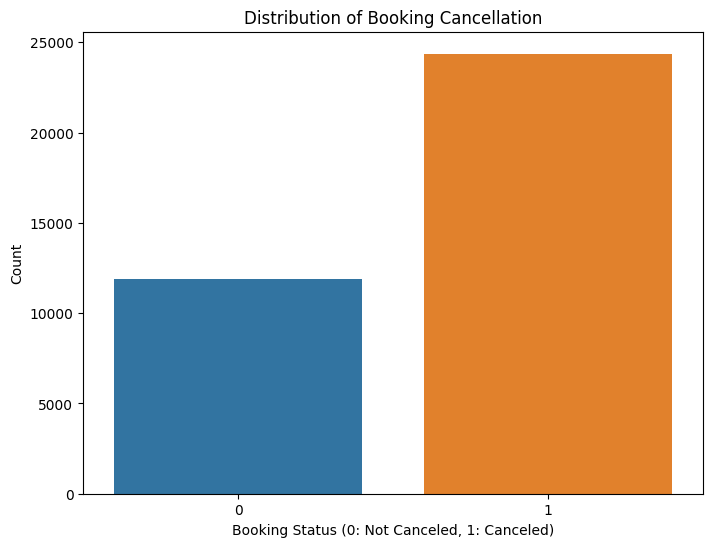

In [17]:
# Distribusi Pembatalan Hotel
plt.figure(figsize=(8, 6))
sns.countplot(x='booking status', data=df_booking)
plt.title('Distribution of Booking Cancellation')
plt.xlabel('Booking Status (0: Not Canceled, 1: Canceled)')
plt.ylabel('Count')
plt.show()

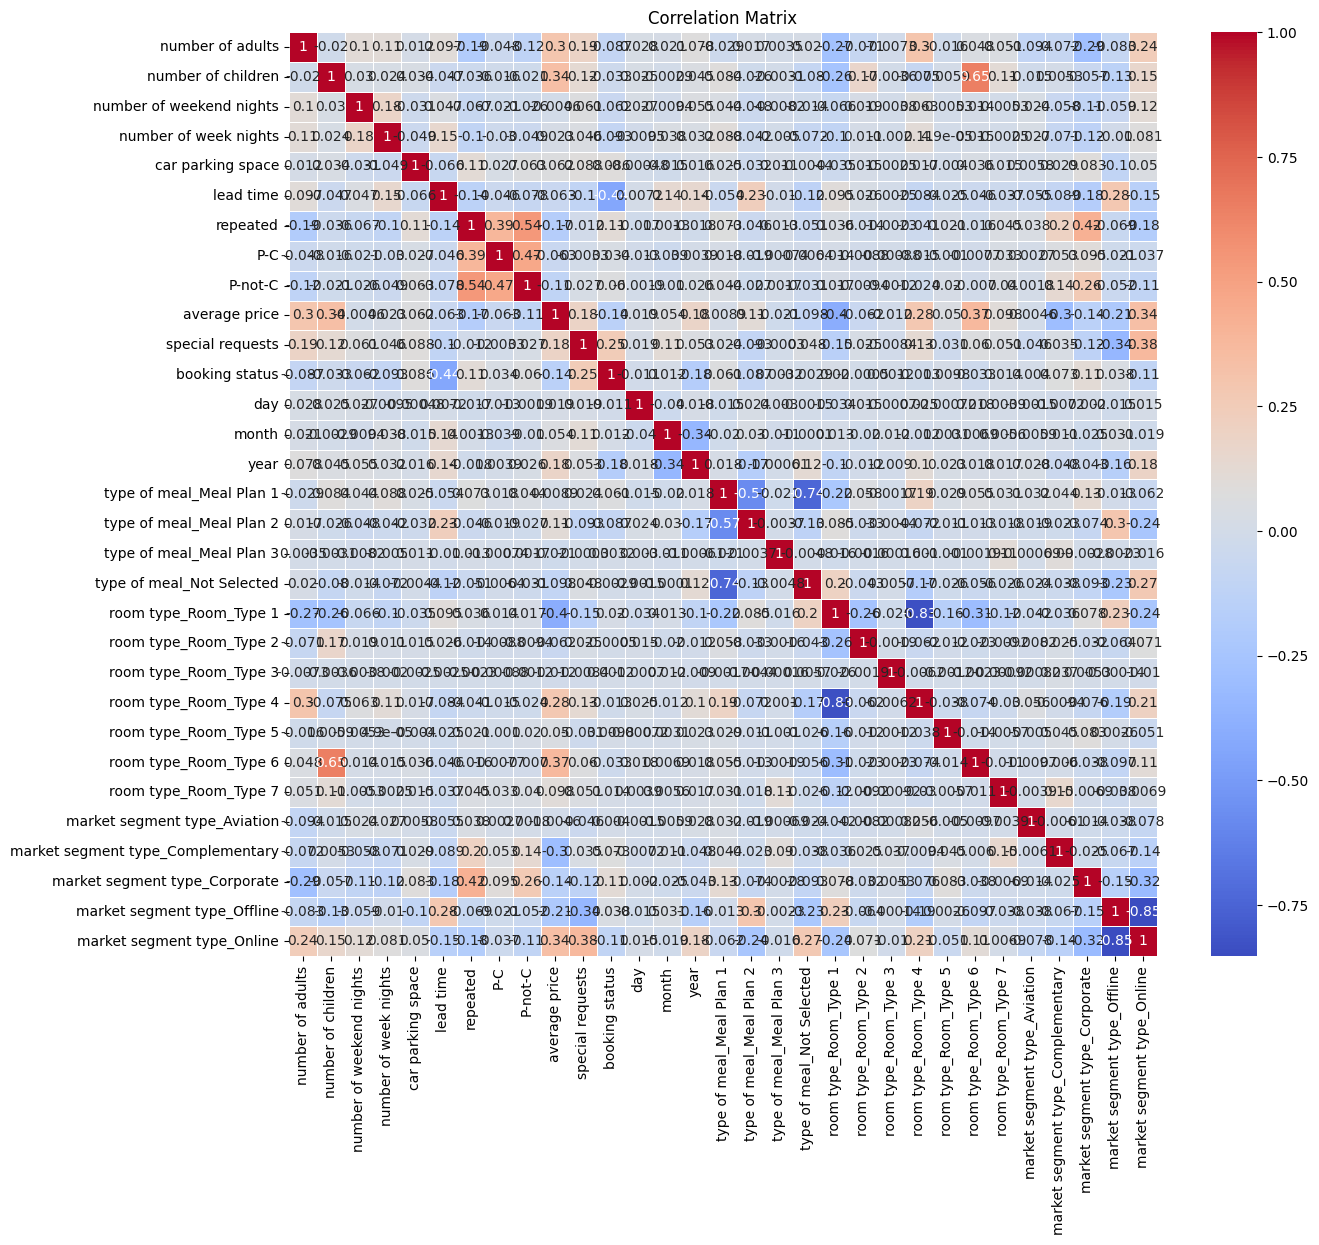

In [18]:
# Korelasi Fitur dengan Pembatalan
corr_matrix = df_booking.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


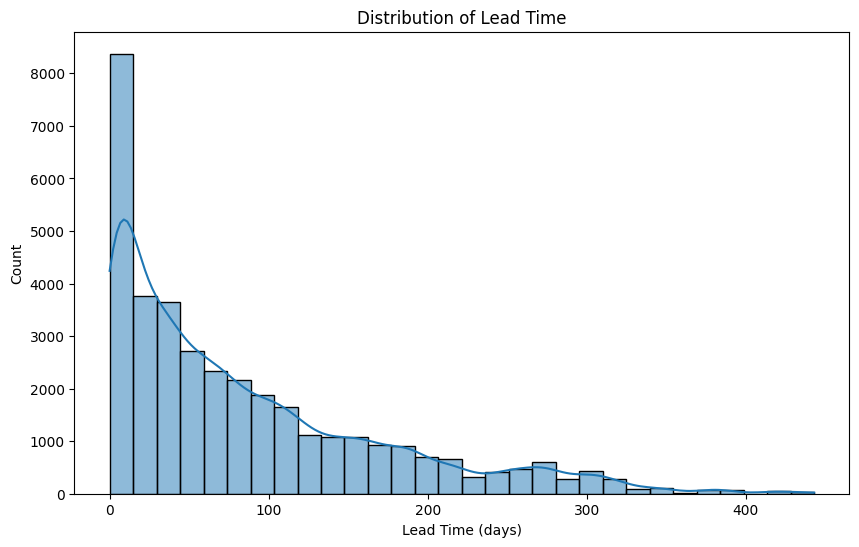

In [19]:
# Analisis Distribusi Lead Time
plt.figure(figsize=(10, 6))
sns.histplot(df_booking['lead time'], bins=30, kde=True)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Count')
plt.show()


## Pemodelan

In [20]:
# Pembagian data
X = df_booking.drop(columns=["booking status"])
y = df_booking["booking status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Pembuatan Model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Pelatihan model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
725/725 [==============================] - 3s 2ms/step - loss: 0.4432 - accuracy: 0.7888 - val_loss: 0.4120 - val_accuracy: 0.8114
Epoch 2/10
725/725 [==============================] - 1s 2ms/step - loss: 0.3939 - accuracy: 0.8181 - val_loss: 0.3961 - val_accuracy: 0.8272
Epoch 3/10
725/725 [==============================] - 1s 2ms/step - loss: 0.3824 - accuracy: 0.8258 - val_loss: 0.3935 - val_accuracy: 0.8236
Epoch 4/10
725/725 [==============================] - 1s 2ms/step - loss: 0.3769 - accuracy: 0.8282 - val_loss: 0.3844 - val_accuracy: 0.8290
Epoch 5/10
725/725 [==============================] - 2s 2ms/step - loss: 0.3721 - accuracy: 0.8290 - val_loss: 0.3833 - val_accuracy: 0.8343
Epoch 6/10
725/725 [==============================] - 1s 2ms/step - loss: 0.3692 - accuracy: 0.8316 - val_loss: 0.3822 - val_accuracy: 0.8331
Epoch 7/10
725/725 [==============================] - 1s 2ms/step - loss: 0.3657 - accuracy: 0.8323 - val_loss: 0.3798 - val_accuracy: 0.8347
Epoch 

In [ ]:
# Evaluasi model
eval_metrics = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", eval_metrics[1])